Importar librerias

In [49]:
import pandas as pd
import os
import matplotlib.pyplot as plt

Carga del dataset

In [50]:
PATH = "./Housing Dreams/"
DATASET = "house_train_raw.csv"

In [51]:
def load_dataset(path,file):
    csv_path = os.path.join(path,file)
    return pd.read_csv(csv_path)

In [52]:
df  = load_dataset(PATH,DATASET)

## EDA

Chequeo de tipo de datos y valores nulos por columnas

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [54]:
df['LotFrontage'].value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64

<AxesSubplot:xlabel='LotFrontage', ylabel='LotArea'>

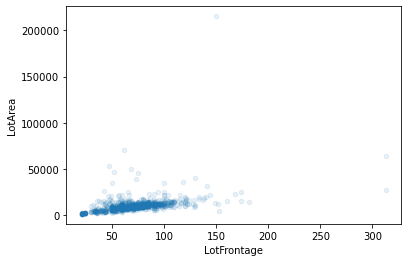

In [55]:
df.plot(kind="scatter", x='LotFrontage', y="LotArea", alpha=0.1)

<AxesSubplot:>

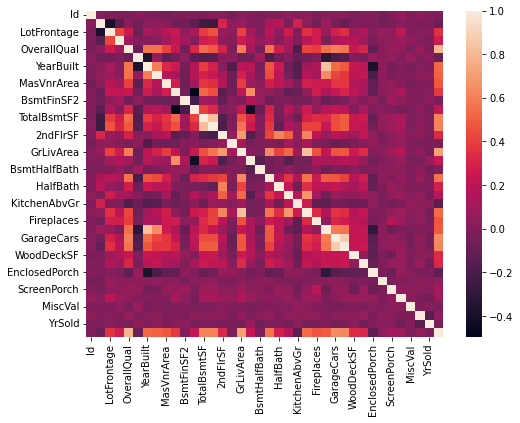

In [56]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(df.corr())

In [57]:
df['Fence'].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [58]:
df['LotShape'].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [59]:
df[df['LotFrontage'].isna()]['LotShape'].value_counts()

IR1    167
Reg     74
IR2     15
IR3      3
Name: LotShape, dtype: int64

Analizar datos de columna Alley, dado que tiene muchos faltantes

In [60]:
df['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [61]:
df.groupby(['Alley'])['SalePrice'].describe()

,count,mean,std,min,25%,50%,75%,max
Alley,,,,,,,,
Grvl,50.0,122219.080000,34780.780734,52500.0,105312.5,119500.0,136750.0,256000.0
Pave,41.0,168000.585366,38370.375243,40000.0,151000.0,172500.0,185000.0,265979.0


<AxesSubplot:>

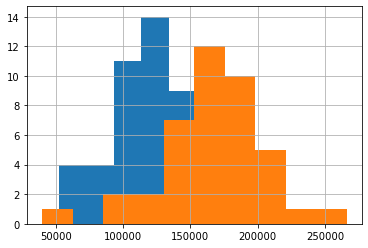

In [62]:
Grvl = df['Alley'] == 'Grvl'
Pave = df['Alley'] == 'Pave'


df[Grvl]['SalePrice'].hist()
df[Pave]['SalePrice'].hist()


Puede que haya información de valor en el tipo de Alley, pero se debe considerar que solo tenemos 6% de valores no nulos. 

In [63]:
1-df['Alley'].isna().sum()/df['SalePrice'].count()

0.06232876712328772

Ahora se analiza la columna LotFrontage

In [64]:
df['LotFrontage'].isna().sum()/df['SalePrice'].count()

0.1773972602739726

<AxesSubplot:>

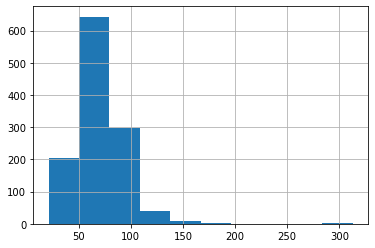

In [65]:
df['LotFrontage'].hist()

No hay ninguna variable con la cual la podamos correlacionar para reemplazar valores faltantes.

In [66]:
df.corr()['LotFrontage'].sort_values(ascending=False).head()

LotFrontage    1.000000
1stFlrSF       0.457181
LotArea        0.426095
GrLivArea      0.402797
TotalBsmtSF    0.392075
Name: LotFrontage, dtype: float64

Se decide completar valores faltantes con la mediana, dado que la media puede estar afectada por los valores extremos de la cola a la derecha.

In [67]:
df['LotFrontage'].median()

69.0

In [68]:
df['LotFrontage'] = df['LotFrontage'].fillna(value=df['LotFrontage'].median())

## Histograma de atributos numéricos

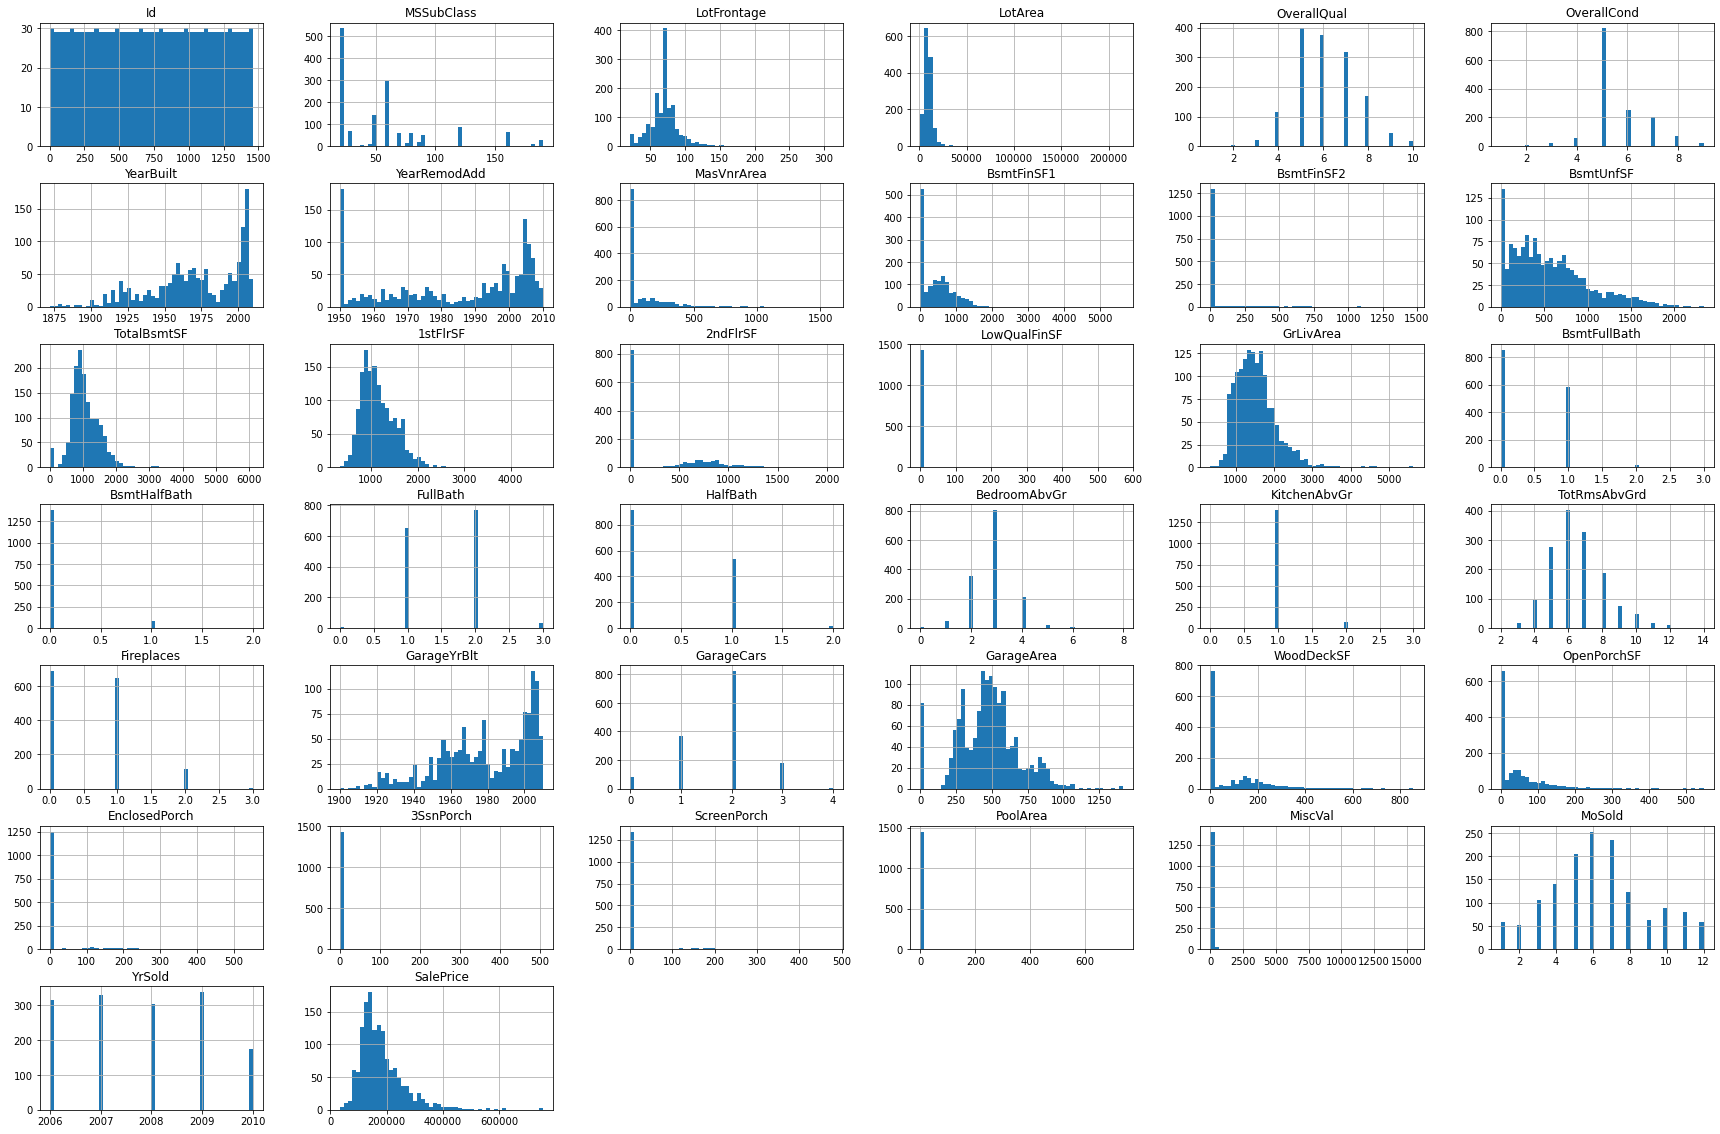

In [69]:
df.hist(bins=50, figsize=(30,20))
plt.show()

Correlación Features con Target

In [70]:
df.corr()['SalePrice'].sort_values(ascending=False).head()

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64

In [71]:
df.corr()['SalePrice'].sort_values(ascending=False).tail()

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

Correlaciones entre features (gráficas)

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

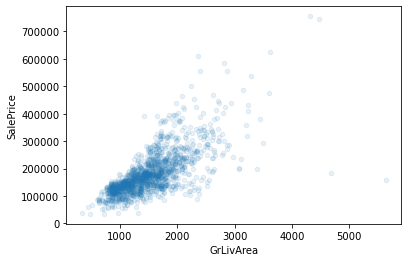

In [72]:
df.plot(kind="scatter", x='GrLivArea', y="SalePrice", alpha=0.1)

<AxesSubplot:xlabel='FullBath', ylabel='SalePrice'>

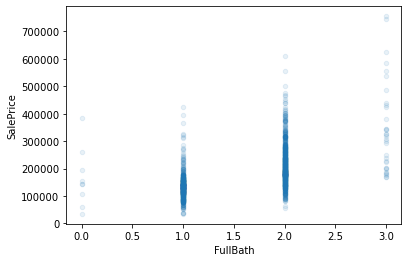

In [73]:
df.plot(kind="scatter", x='FullBath', y="SalePrice", alpha=0.1)

<AxesSubplot:xlabel='OverallQual', ylabel='OverallCond'>

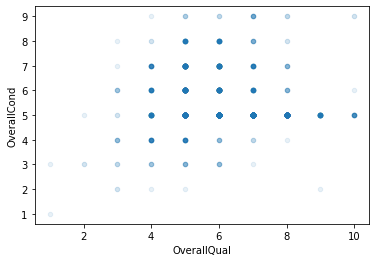

In [74]:
df.plot(kind="scatter", x='OverallQual', y="OverallCond", alpha=0.1)